In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import tensorflow as tf ; 
import re ; 
import os ;
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/amazon-product-length-prediction-dataset/dataset/sample_submission.csv
/kaggle/input/amazon-product-length-prediction-dataset/dataset/train.csv
/kaggle/input/amazon-product-length-prediction-dataset/dataset/test.csv


OBJECTIVE : PREDICTING PRODUCT LENGTH FROM DATA (AMAZON PRODUCT DATASET)

METHODS USED --

**FEATURES = CONCATENATION OF (TITLE + DESCRIPTION + BULLET POINT)**

*FEATURE ENGINEERING*

1. REMOVAL OF HTML TAGS  
2. REMOVAL PUNCTUATION MARKS  (!,?,. => "")
3. REMOVAL OF CONTROL CHARACTERS  ("/xe2/e80" => "")
4. FLATTENING THE FEATURES 
3. TOKENIZATION OF FEATURES 
4. INTEGER VECTORIZATION OF FEATURES

*REGRESSION MODEL*

1.SEQUENTIAL MODEL WITH 3 LAYER DEEP

2.FOR ACTIVATION RELU IS USED since LENGTH IS A ALWAYS POSITIVE 

3.MODEL WEIGHTS IS SAVED AFTER EACH EPOCH USING CALLBACKS




In [2]:
BATCH_SIZE = 512
train_ds = tf.data.experimental.make_csv_dataset(
    "/kaggle/input/amazon-product-length-prediction-dataset/dataset/train.csv",
    batch_size=BATCH_SIZE,
    num_epochs=1 , 
    prefetch_buffer_size=1024,
    ignore_errors=tf.data.Dataset.ignore_errors , 
    select_columns=['TITLE','BULLET_POINTS','DESCRIPTION','PRODUCT_LENGTH'],
    label_name='PRODUCT_LENGTH',
    num_parallel_reads=10,

)
for features , labels in train_ds.take(1) :
    for key , value in features.items():
        print(f"{key} : {value}")
    print("Length" , labels.numpy())

TITLE : [b'Om Anvay Womens Beauty Slim Lift Slimming Pants Shapewear Women\xe2\x80\x99s Blended High Waist Tummy & Thigh, Slim n Lift Body Shaper'
 b'Gorgeous Flap Zipper PU Leather Stylish Wallet for Women/Girls Eye (Brown)'
 b'How to Win Friends and Influence People'
 b'Samcase Lord Mahadev Design Printed Soft Designer Mobile Back Cover for Redmi 9A'
 b'Hair4Real Hair Fibres Refill (Dark Brown) 25 grams & Hair Locking Spray - 30 ml.'
 b'Wireless Mouse - Camaro Highway Patrol'
 b'On The Farm Coloring Book Fun With Shapes Colors Numbers Letters: Big Activity Workbook for Toddlers & Kids Ages 1-5 for Preschool or Kindergarten Prep'
 b'Vendoz Women Latest White White Golden Casual Shoes Sports Shoes Sneakers - 39 EU'
 b'Disney Minnie Mouse Oval Bubble Bath Mat, 15.75" X 27"'
 b'TheLittles24 Black: Universal FIT FOOTMUFF Cosy Toes FIT Buggy & All PUSCHAIR Accessories (Black)'
 b'Marvel Legends Giant Man Series Sentry Bearded Dark Mustard Variant by TOYBIZ'
 b'Icy Hot Medicated Pain Relief

PREPROCESSING FEATURES 

    -REMOVING HTML

    -REMOVING PANTUATIONS

    -REMOVING CONTROL CHARACTERS 
    
    -REPLACING NEW LINES WITH EMPTY SPACES

FEATURE ENGINEERING

In [3]:
def flatten_columns(features, label):
    # Join the TITLE, BULLET_POINTS, and DESCRIPTION columns into a single string
    text = tf.strings.join([features['TITLE'], features['BULLET_POINTS'], features['DESCRIPTION']], separator=' ')
    # Removing HTML from text 
    text = tf.strings.regex_replace(text,"<[^>]+>", " ")
    # Convert the string to lowercase
    text = tf.strings.lower(text)
    # Replace any newline characters with spaces
    text = tf.strings.regex_replace(text, '\n', ' ')
    #Removing Control Character
    text = tf.strings.regex_replace(text, "[^\w\s]", " ")
    # label = 1/(label+1);
    # Return the flattened text and the label
    return  text, label
train_ds = train_ds.map(flatten_columns)
for x in train_ds.take(1):
    print(x)

(<tf.Tensor: shape=(512,), dtype=string, numpy=
array([b'sanita yara flex for women size us w 6 5 7 black  fancy sandals made from wood and leather   flex sole is made by a mix of wood and rubber  which combines fashionable look with comfort selected wood heel compnents harvested from fcs approved sustainable forests  platform and heel of basswood handcrafted made in europe  sanita yara flex   discover your new favorite sanitas  made out of wood and high qulity leaher  this shoe makes some apperance  at the same time this is accompanied by a special elegance in design  the adjustable strap gives you a good grip  while standing on a comfortable heel height  try out the sanita yara flex ',
       b'het paard onder de volken van het maleische ras  1894   ',
       b'mancloem horsehair crinoline braids can can net strip for lehnga skirt making very and premium boutique range nylon white  1inch  45   horsehair braid is a kind of crinoline netting that can be used as a decorative trim  or an

TOKENIZATION OF FEATURES

In [4]:
VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 200
train_int_vectorization = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE,
                                                        output_mode='int',
                                                        output_sequence_length=MAX_SEQUENCE_LENGTH);
train_text_dataset =train_ds.map(lambda text,labels: text)
train_int_vectorization.adapt(train_text_dataset);
def train_int_vecotrize_text(text,label):
    text = tf.expand_dims(text,-1);
    return train_int_vectorization(text) , label ; 

MAPING TRAIN DATASET TO THEIR INTEGER VECTORIZED FORM

In [5]:
featurs , label = train_ds.as_numpy_iterator().next()
first_text , first_label = featurs[1] , label[1] ; 
print("Feature" , first_text);
print("Label",first_label)
print("'int' vectorized Feature : ",train_int_vecotrize_text(first_text, first_label)[0])
train_ds = train_ds.map(train_int_vecotrize_text);

Feature b'vinyl cloth bling christmas backdrop studio photography background photo props  6x9ft 1 8x2 7m   color  our backdrop use high definition digital printing and thermal transfer technology  which can print the color more realistically on the background cloth  and it will not fade even if it is washed for many times  compared with other similar products  this color will appear brighter and more realistic  material  photography background using high quality vinyl  which light weight and easy handling easy to carry  durable and wrinkle free excellent color treatment  realistic detail and artistic effect  situation  ideal for indoor shooting  wedding  party  use this backdrop in studios  booths  during parties newborns  children  home decoration  and product photography  as well as for video backdrops or displays   depending on the background   warm tips  1 remove crease  if necessary  please iron the back surface with steam iron with low heat but not dry iron and it is best to lay 

SPLITING DATASET TO TRAIN AND VALIDATION

In [6]:
dataset_size = 2249698
train_percent = 0.7
train_size =int(int(dataset_size * train_percent)/BATCH_SIZE) ;
validation_size = dataset_size - train_size
train = train_ds.take(train_size)
val = train_ds.skip(train_size)
del train_ds

MAKING REGRESSION MODEL AND SETTING LAST LAYER ACTIVATION AS RELU since LENGHT IS ALWAYS POSITIVIE

In [7]:
checkpoints = tf.keras.callbacks.ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True)

def create_model(vocab_size , num_labels):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100,activation="relu"),
        tf.keras.layers.Dense(50,activation="relu"),
        tf.keras.layers.Dense(20,activation="relu"),
        tf.keras.layers.Dense(num_labels,activation="relu")
        
    ])
    return model
model = create_model(vocab_size=VOCAB_SIZE+1 , num_labels=1)
model.compile(loss=tf.keras.losses.mean_absolute_error,optimizer='adam',metrics=['mse'])

history = model.fit(train,validation_data=val , epochs=10,callbacks=[checkpoints])

Epoch 1/10
3075/3075 [==============================] - 113s 36ms/step - loss: 3893.2314 - mse: 2444436176896.0000 - val_loss: 3241.7483 - val_mse: 387700195328.0000
Epoch 2/10
3075/3075 [==============================] - 110s 36ms/step - loss: 3870.6826 - mse: 2444382961664.0000 - val_loss: 3226.0227 - val_mse: 387801415680.0000
Epoch 3/10
3075/3075 [==============================] - 110s 36ms/step - loss: 3851.6584 - mse: 2444435128320.0000 - val_loss: 3220.4126 - val_mse: 387889430528.0000
Epoch 4/10
3075/3075 [==============================] - 109s 35ms/step - loss: 3832.1897 - mse: 2444376932352.0000 - val_loss: 3185.5703 - val_mse: 387681484800.0000
Epoch 5/10
3075/3075 [==============================] - 112s 36ms/step - loss: 3825.1702 - mse: 2444384272384.0000 - val_loss: 3191.8250 - val_mse: 387800825856.0000
Epoch 6/10
3075/3075 [==============================] - 110s 36ms/step - loss: 3817.5103 - mse: 2444385583104.0000 - val_loss: 3181.7615 - val_mse: 387785785344.0000
Epoc

MAKING GRAPH OF VALIDATION VS EPOCHS

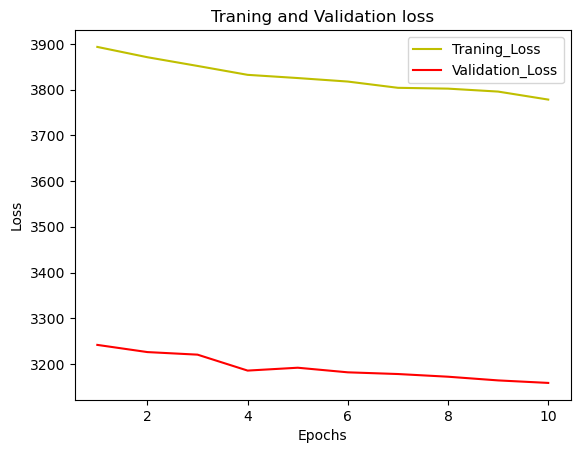

In [8]:
from matplotlib.pyplot import plot , xlabel , ylabel , legend ,show ,title ;
loss = history.history['loss']
val_loss = history.history['val_loss'];
epochs = range(1,len(loss)+1);
plot(epochs ,loss , 'y',label='Traning_Loss');
plot(epochs , val_loss , 'r' , label = 'Validation_Loss')
title("Traning and Validation loss") 
xlabel('Epochs')
ylabel('Loss')
legend()
show()